In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
df_listings = pd.read_csv('listings.csv')
print(df_listings.columns)




Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

#following steps were conducted to get a better understanding of the listing dataframe

In [4]:
#shows number of non-null values in each column and respective datatype
df_listings.info()


# shows columns with no missing values
print(df_listings.columns[np.sum(df_listings.isnull())==0])




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

c:\Users\q623737\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


1) In the following part the neighborhoods with the highest number of listings were analysed

Text(0, 0.5, 'Percentage')

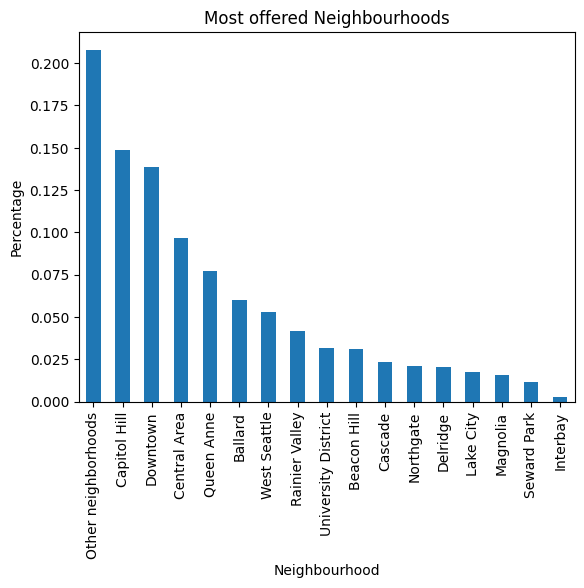

In [5]:

neighbourhood_listings=(df_listings.neighbourhood_group_cleansed).value_counts()
(neighbourhood_listings/df_listings.shape[0]).plot(kind="bar")
plt.title("Most offered Neighbourhoods")
plt.xlabel('Neighbourhood')
plt.ylabel('Percentage')





Looking at the average availability per neigboorhood

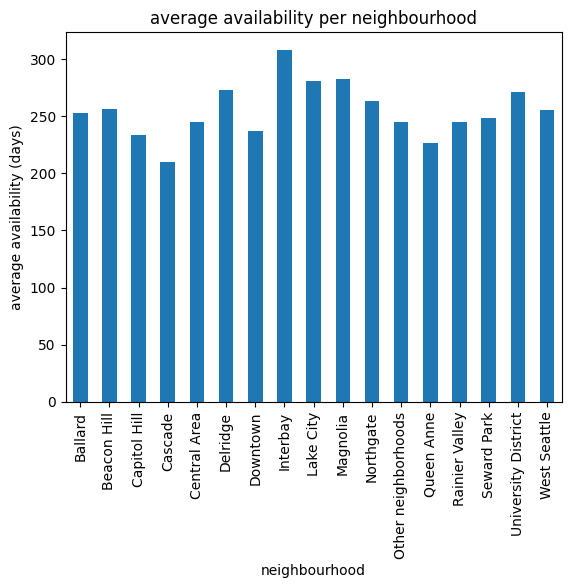

In [18]:
avg_availability_by_neighborhood = df_listings.groupby('neighbourhood_group_cleansed')['availability_365'].mean()


# Creation of bar chart
avg_availability_by_neighborhood.plot(kind='bar')

plt.title('average availability per neighbourhood')
plt.xlabel('neighbourhood')
plt.ylabel('average availability (days)')

plt.show()


looking for the correlation between the different variables, focussing on the possibility to predict the price based on selected variables

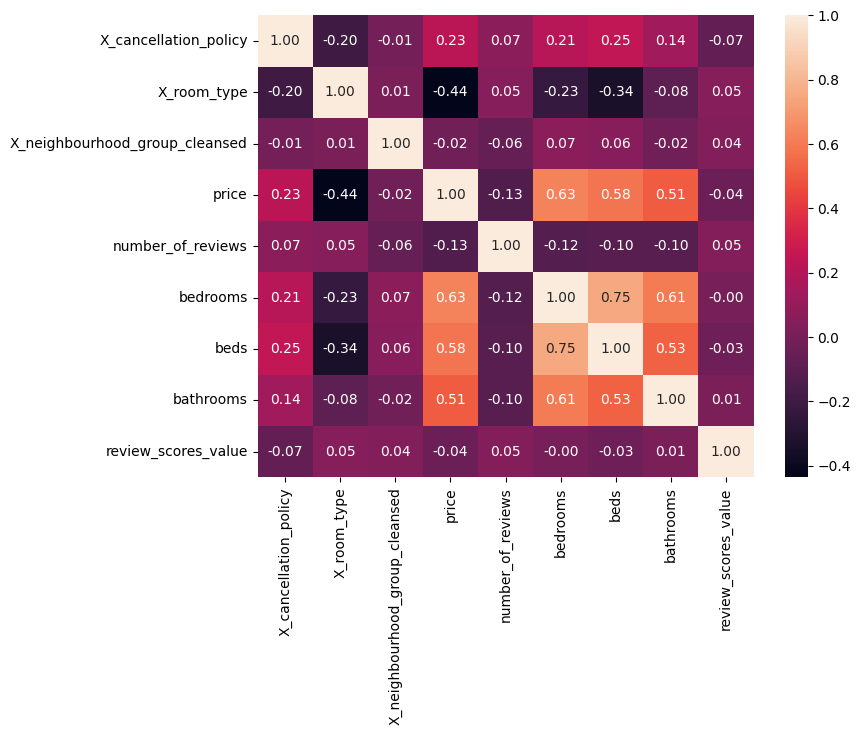

In [6]:


# Encoding der "neighbourhood_group_cleansed" Spalte
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_listings["X_neighbourhood_group_cleansed"] = encoder.fit_transform(df_listings["neighbourhood_group_cleansed"]).astype(float)
df_listings["X_cancellation_policy"] = encoder.fit_transform(df_listings["cancellation_policy"]).astype(str)
df_listings["X_room_type"] = encoder.fit_transform(df_listings["room_type"]).astype(str)



# change datatype
df_listings["X_cancellation_policy"] = df_listings["X_cancellation_policy"].astype(float)
df_listings["X_room_type"] = df_listings["X_room_type"].astype(float)
df_listings["number_of_reviews"] = df_listings["number_of_reviews"].astype(float)
df_listings["price"] = df_listings["price"].str.replace("$", "").str.replace(",", "").astype(float)
df_listings["number_of_reviews"]=df_listings["number_of_reviews"].astype(float)

# Creation of heatmap with selected variables
heatmap_data = df_listings[['X_cancellation_policy', 'X_room_type', 'X_neighbourhood_group_cleansed', 'price', 'number_of_reviews', 'bedrooms', 'beds', 'bathrooms', 'review_scores_value']]
heatmap_data = heatmap_data.dropna()

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.corr(), annot=True, fmt=".2f");

Checking whether the found correlation can be used to explain the price variable by a linear regression:

In [9]:

# checking if there is a linear relationship between price and roomtype, cancellation policy and neighbourhood

import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

regression_data = df_listings[['X_cancellation_policy', 'X_room_type', 'bedrooms', 'beds', 'bathrooms','price']]
regression_data = regression_data.dropna()

#linear Regression
X=regression_data[['X_cancellation_policy', 'X_room_type', 'bedrooms', 'beds', 'bathrooms']]
y=regression_data['price']

x_train , x_test, y_train, y_test = train_test_split (X, y, test_size=0.3)

lm_model =LinearRegression(fit_intercept=True)
lm_model.fit(x_train, y_train)


# check the model fit

from sklearn.metrics import r2_score, mean_squared_error

y_pred = lm_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-Quadrat (R²): {r2:.2f}")
print(f"Mittlerer quadratischer Fehler (MSE): {mse:.2f}")
print(f"Wurzel des mittleren quadratischen Fehlers (RMSE): {rmse:.2f}")








R-Quadrat (R²): 0.45
Mittlerer quadratischer Fehler (MSE): 4560.92
Wurzel des mittleren quadratischen Fehlers (RMSE): 67.53
